## Алгоритмы кластеризации

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:552: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The def

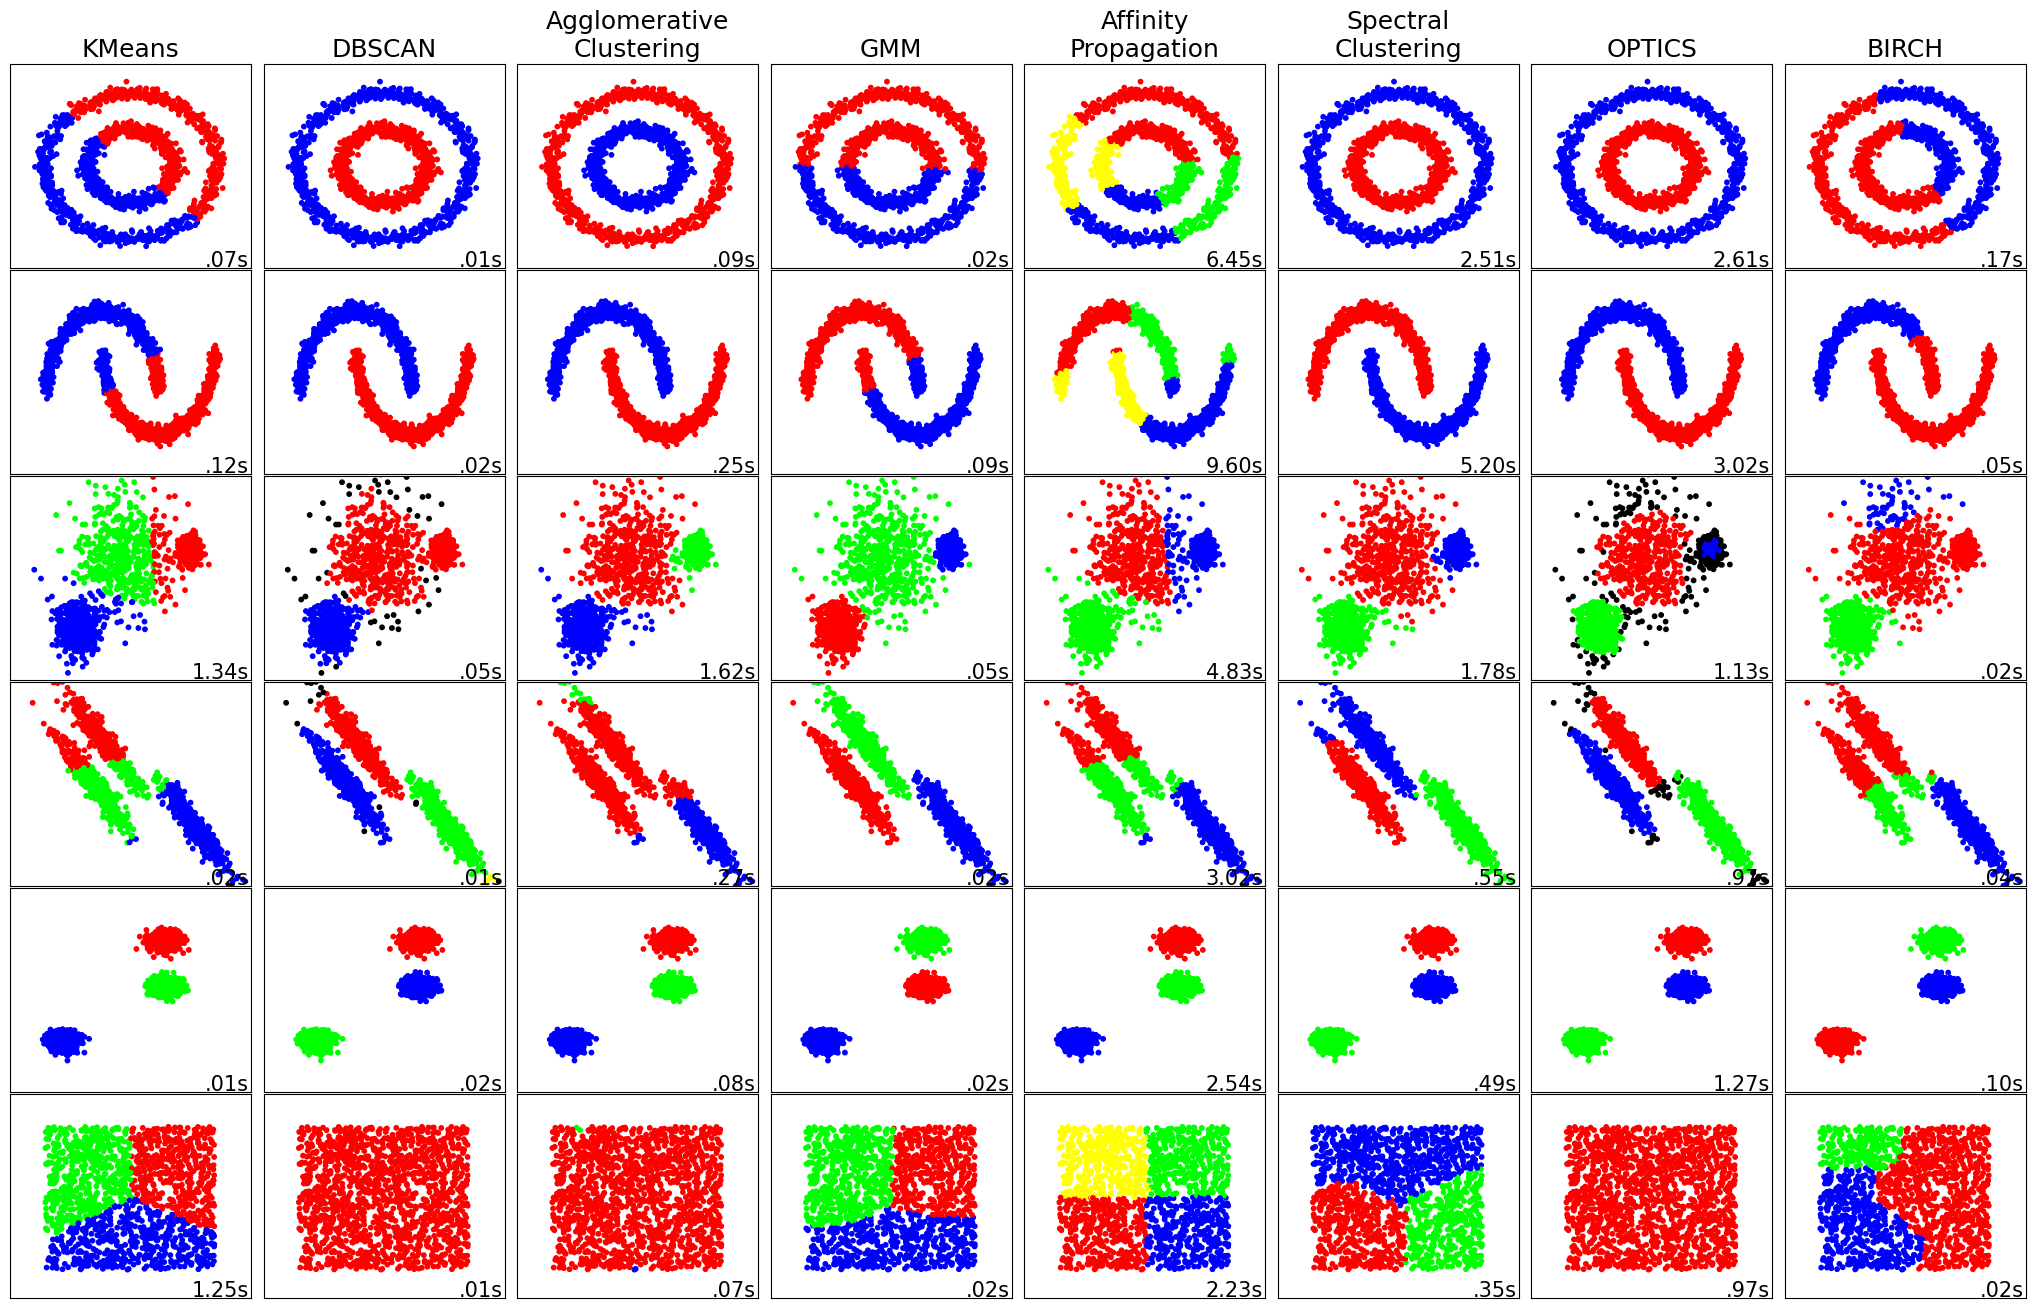

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice


n_samples = 1500

noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)

noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

no_structure = np.random.rand(n_samples, 2), None

random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.95, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    params = default_base.copy()
    params.update(algo_params)
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    connectivity = kneighbors_graph(X, n_neighbors=params['n_neighbors'], include_self=False)
    connectivity = 0.5 * (connectivity + connectivity.T)
    kmeans = cluster.KMeans(n_clusters=params['n_clusters'])
    spectral = cluster.SpectralClustering(n_clusters=params['n_clusters'], eigen_solver='arpack',affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],xi=params['xi'],min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(linkage="average", affinity="cityblock",n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('KMeans', kmeans),
        ('DBSCAN', dbscan),
        ('Agglomerative\nClustering', average_linkage),
        ('GMM', gmm),
        ('Affinity\nPropagation', affinity_propagation),
        ('Spectral\nClustering', spectral),
        ('OPTICS', optics),
        ('BIRCH', birch)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#ff0000', '#0000ff', '#00ff00',
                                             '#ffff00']),
                                      int(max(y_pred) + 1))))
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

## Алгоритмы выбора оптимального числа кластеров и кластеризация для выбранного датасета

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
game = pd.read_csv('ign.csv')
game.drop(['url', 'Unnamed: 0', 'title'], axis= 1 , inplace= True )
game.dropna(inplace=True)
game

,score_phrase,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,iPad,8.5,Puzzle,N,2012,9,12
3,Great,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,PlayStation 3,8.5,Sports,N,2012,9,11
...,...,...,...,...,...,...,...,...
18620,Good,Wii U,7.6,RPG,N,2016,6,29
18621,Amazing,PlayStation 4,9.0,"Action, Adventure",Y,2016,6,29
18622,Mediocre,PlayStation 4,5.8,RPG,N,2016,6,28
18623,Masterpiece,Xbox One,10.0,Adventure,Y,2016,6,28


In [ ]:
game = pd.get_dummies(game, columns = ['genre','platform'])
patterns = {
    "N": 0,
    "Y": 1
}
game = game.replace(patterns)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(game)

scaled_data = pd.DataFrame(d, columns=game.columns)
scaled_data.head()

,score,editors_choice,release_year,release_month,release_day,genre_Action,"genre_Action, Adventure","genre_Action, Compilation","genre_Action, Editor","genre_Action, Platformer",...,platform_Windows Surface,platform_Wireless,platform_WonderSwan,platform_WonderSwan Color,platform_Xbox,platform_Xbox 360,platform_Xbox One,platform_iPad,platform_iPhone,platform_iPod
0,0.894737,1.0,0.913043,0.727273,0.366667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.894737,1.0,0.913043,0.727273,0.366667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.842105,0.0,0.913043,0.727273,0.366667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.842105,0.0,0.913043,0.727273,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.842105,0.0,0.913043,0.727273,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
models = []
score1 = []
score2 = []

for i in range(2,10):
  model = KMeans(n_clusters=i,random_state=132, init='k-means++').fit(scaled_data)
  models.append(model)
  score1.append(model.inertia_)
  score2.append(silhouette_score(scaled_data, model.labels_))

In [ ]:
plt.grid()
plt.title("SSE")
plt.plot(np.arange(2,10), score1, marker = '*')
plt.figure(figsize=(10, 5))
plt.show()

In [ ]:
plt.grid()
plt.title("Average silhouette score")
plt.plot(np.arange(2,10), score2, marker = '*')
plt.figure(figsize=(10, 5))
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture

input_gmm = scaled_data

bic_list = []
aic_list = []
ranges = range(1,10)

for i in ranges:
    gmm = GaussianMixture(n_components=i).fit(input_gmm)
    bic = gmm.bic(input_gmm)
    bic_list.append(bic)
    aic = gmm.aic(input_gmm)
    aic_list.append(aic)

plt.figure(figsize=(10, 5))
plt.plot(ranges, bic_list, label='BIC');
plt.plot(ranges, aic_list, label='AIC');
plt.legend(loc='best');

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=132)
data_tsne = tsne.fit_transform(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Dimension 2')

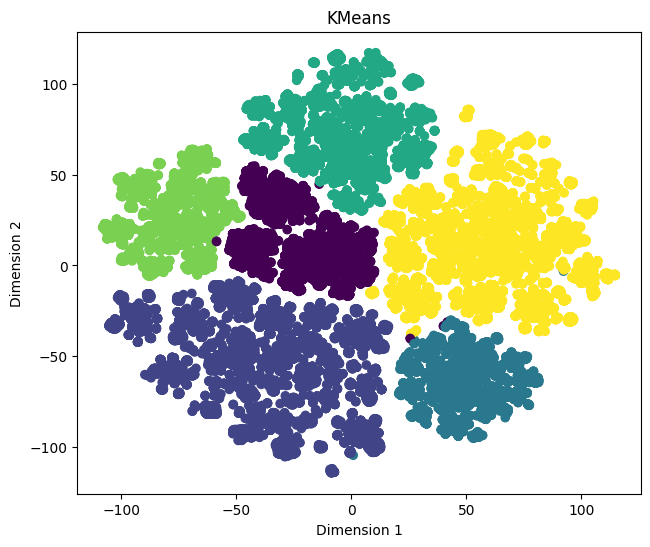

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
clusters = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=clusters)
plt.title('KMeans')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

Text(0, 0.5, 'Dimension 2')

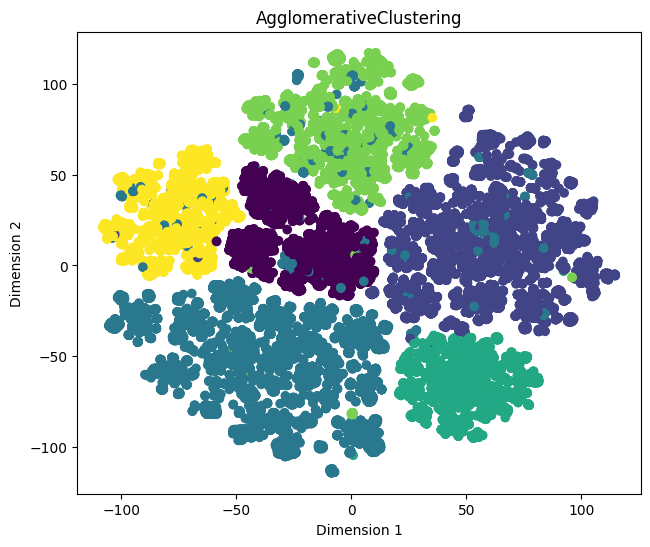

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agglomerativeclustering = AgglomerativeClustering(6,compute_distances=True)
clusters = agglomerativeclustering.fit_predict(scaled_data)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=clusters)
plt.title('AgglomerativeClustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

Text(0, 0.5, 'Dimension 2')

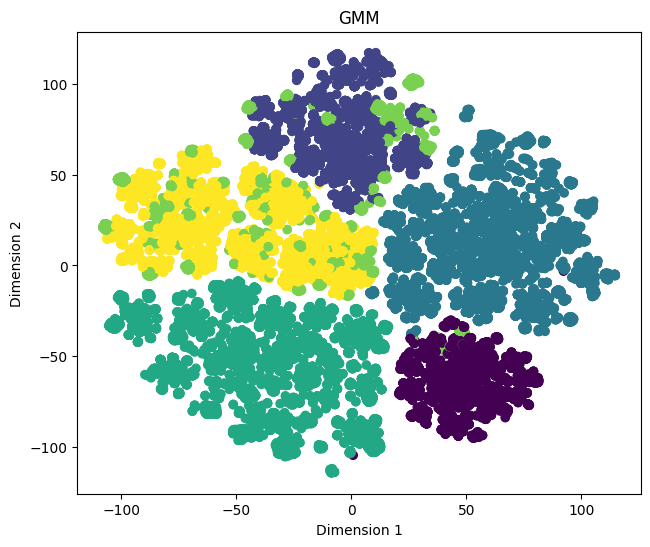

In [ ]:
 from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6,covariance_type='full')
clusters = gmm.fit_predict(scaled_data)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=clusters)
plt.title('GMM')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

Text(0, 0.5, 'Dimension 2')

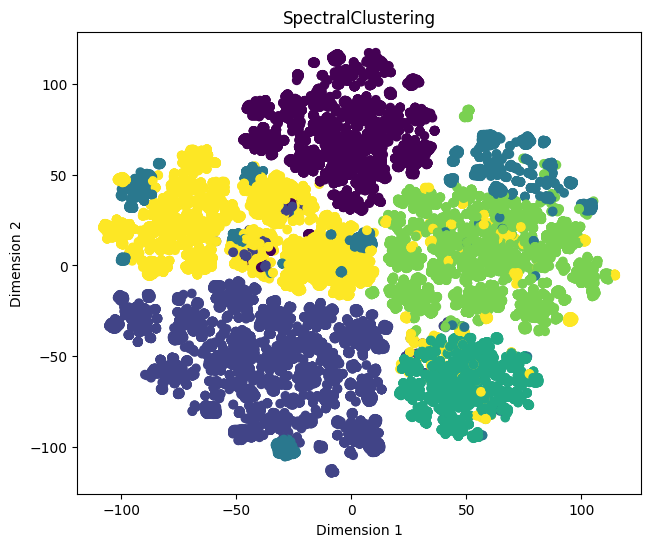

In [ ]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=6)
clusters = spectral.fit_predict(scaled_data)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=clusters)
plt.title('SpectralClustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

Text(0, 0.5, 'Dimension 2')

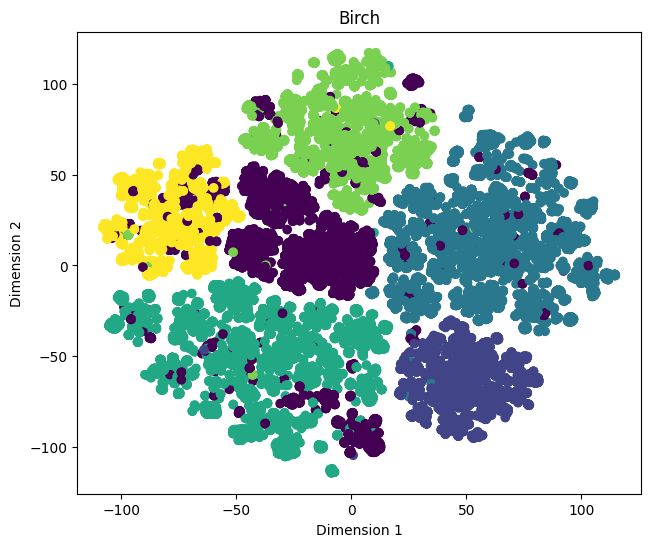

In [ ]:
from sklearn.cluster import Birch
birch = Birch(n_clusters=6)
clusters = birch.fit_predict(scaled_data)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=clusters)
plt.title('Birch')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

Text(0, 0.5, 'Dimension 2')

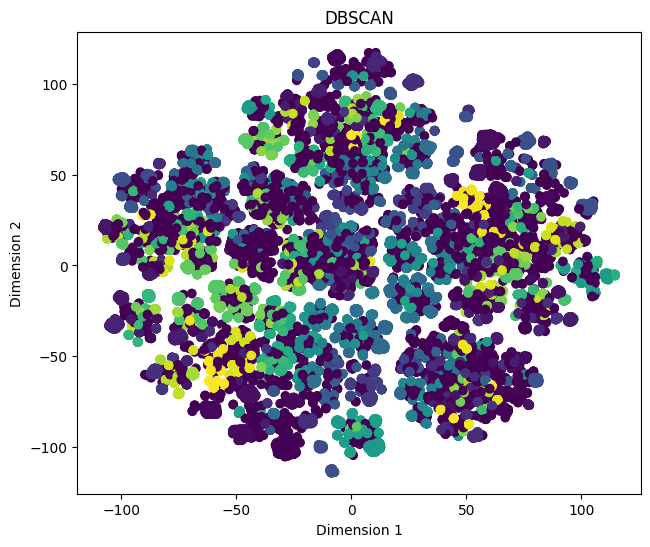

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.9)
clusters = dbscan.fit_predict(scaled_data)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=clusters)
plt.title('DBSCAN')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

In [ ]:
pip install scikit-learn-extra

Text(0, 0.5, 'Dimension 2')

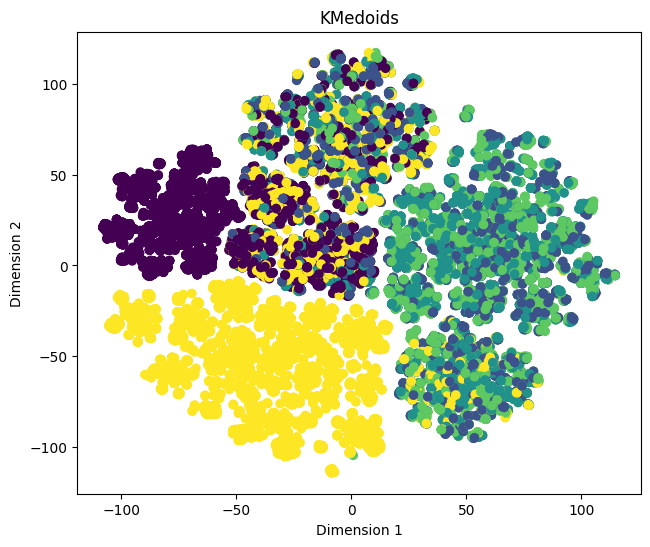

In [ ]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=6)
clusters = kmedoids.fit_predict(scaled_data)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=clusters)
plt.title('KMedoids')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')